In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samishiraz00","key":"46891157b5e279e456473375fee471b9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 9.78MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 61.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.71MB/s]


**End of Distribution imputation**

It replace nan values by end of distribution of variable

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/train.csv', usecols=['Survived', 'Age', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


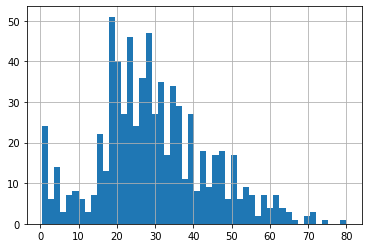

In [7]:
df.Age.hist(bins=50)

In [8]:
extreme=df.Age.mean()+3*df.Age.std()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


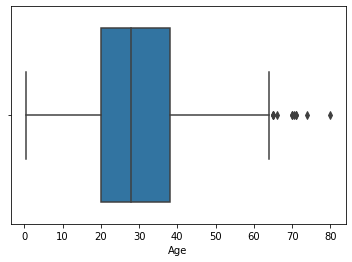

In [9]:
import seaborn as sns

sns.boxplot(df['Age'])

In [10]:
median = df.Age.median()
median

28.0

In [11]:
def impute_nan(df, variable, median, extreme):
  df[variable+'_end-distribution'] = df[variable].fillna(extreme)
  df[variable] = df[variable].fillna(median)

In [12]:
impute_nan(df, 'Age', median, extreme)

df.head()

,Survived,Age,Fare,Age_end-distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
df.isnull().sum()

Survived                0
Age                     0
Fare                    0
Age_end-distribution    0
dtype: int64

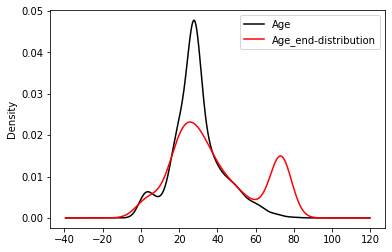

In [14]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax, color='black') 
df['Age_end-distribution'].plot(kind='kde', ax=ax, color="red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

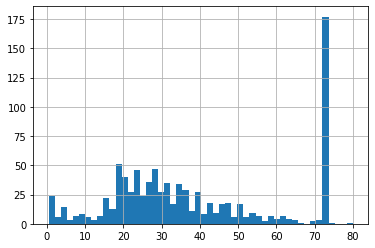

In [15]:
df['Age_end-distribution'].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


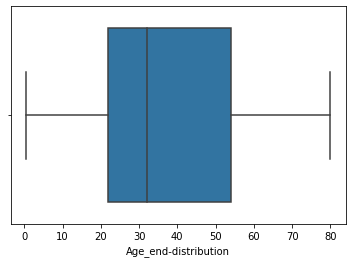

In [16]:
sns.boxplot(df['Age_end-distribution'])